<a href="https://colab.research.google.com/github/MT121201/Binary-Classification_of_Machine_Failures/blob/main/Machine_Failures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! git clone https://github.com/MT121201/Binary-Classification_of_Machine_Failures

Cloning into 'Binary-Classification_of_Machine_Failures'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 18 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (18/18), 6.70 MiB | 4.71 MiB/s, done.


#Import Libs

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
import math

# Load Data

In [6]:
train_df = pd.read_csv('/content/Binary-Classification_of_Machine_Failures/train.csv')
test_df = pd.read_csv('/content/Binary-Classification_of_Machine_Failures/test.csv')
sub=pd.read_csv('/content/Binary-Classification_of_Machine_Failures/sample_submission.csv')
train_df

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,136424,M22284,M,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,136425,H38017,H,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,136426,L54690,L,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,136427,L53876,L,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


#Exploring Data

In [7]:
Df = [train_df, test_df]
names = ['Training Data','Test Data']
print('Data Information')
for df,name in zip(Df,names):
    print(name)
    print(df.info())
    print('--'*30)

Data Information
Training Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136

In [8]:
# Drop ID
train_df.drop('id', axis = 1, inplace = True)
test_df.drop('id', axis = 1, inplace = True)

In [11]:
desc = train_df.describe().transpose()
desc = desc.style.background_gradient()
desc

,count,mean,std,min,25%,50%,75%,max
Air temperature [K],136429.000000,299.862776,1.862247,295.300000,298.300000,300.000000,301.200000,304.400000
Process temperature [K],136429.000000,309.941070,1.385173,305.800000,308.700000,310.000000,310.900000,313.800000
Rotational speed [rpm],136429.000000,1520.331110,138.736632,1181.000000,1432.000000,1493.000000,1580.000000,2886.000000
Torque [Nm],136429.000000,40.348643,8.502229,3.800000,34.600000,40.400000,46.100000,76.600000
Tool wear [min],136429.000000,104.408901,63.965040,0.000000,48.000000,106.000000,159.000000,253.000000
Machine failure,136429.000000,0.015744,0.124486,0.000000,0.000000,0.000000,0.000000,1.000000
TWF,136429.000000,0.001554,0.039389,0.000000,0.000000,0.000000,0.000000,1.000000
HDF,136429.000000,0.005160,0.071649,0.000000,0.000000,0.000000,0.000000,1.000000
PWF,136429.000000,0.002397,0.048899,0.000000,0.000000,0.000000,0.000000,1.000000
OSF,136429.000000,0.003958,0.062789,0.000000,0.000000,0.000000,0.000000,1.000000


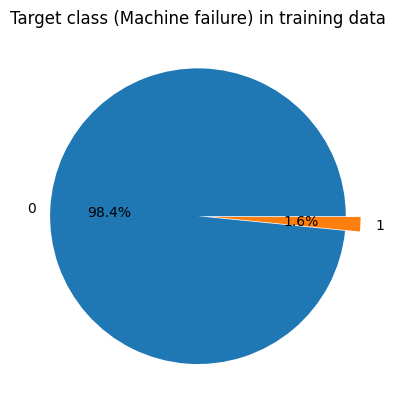

In [15]:
# Check Infomation Bias in Train data and Test data
pie = train_df['Machine failure'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=False)
pie.set_title('Target class (Machine failure) in training data')
pie.set_ylabel('')
plt.show(pie)
# Strong imbalance

<Axes: xlabel='Machine failure', ylabel='Tool wear [min]'>

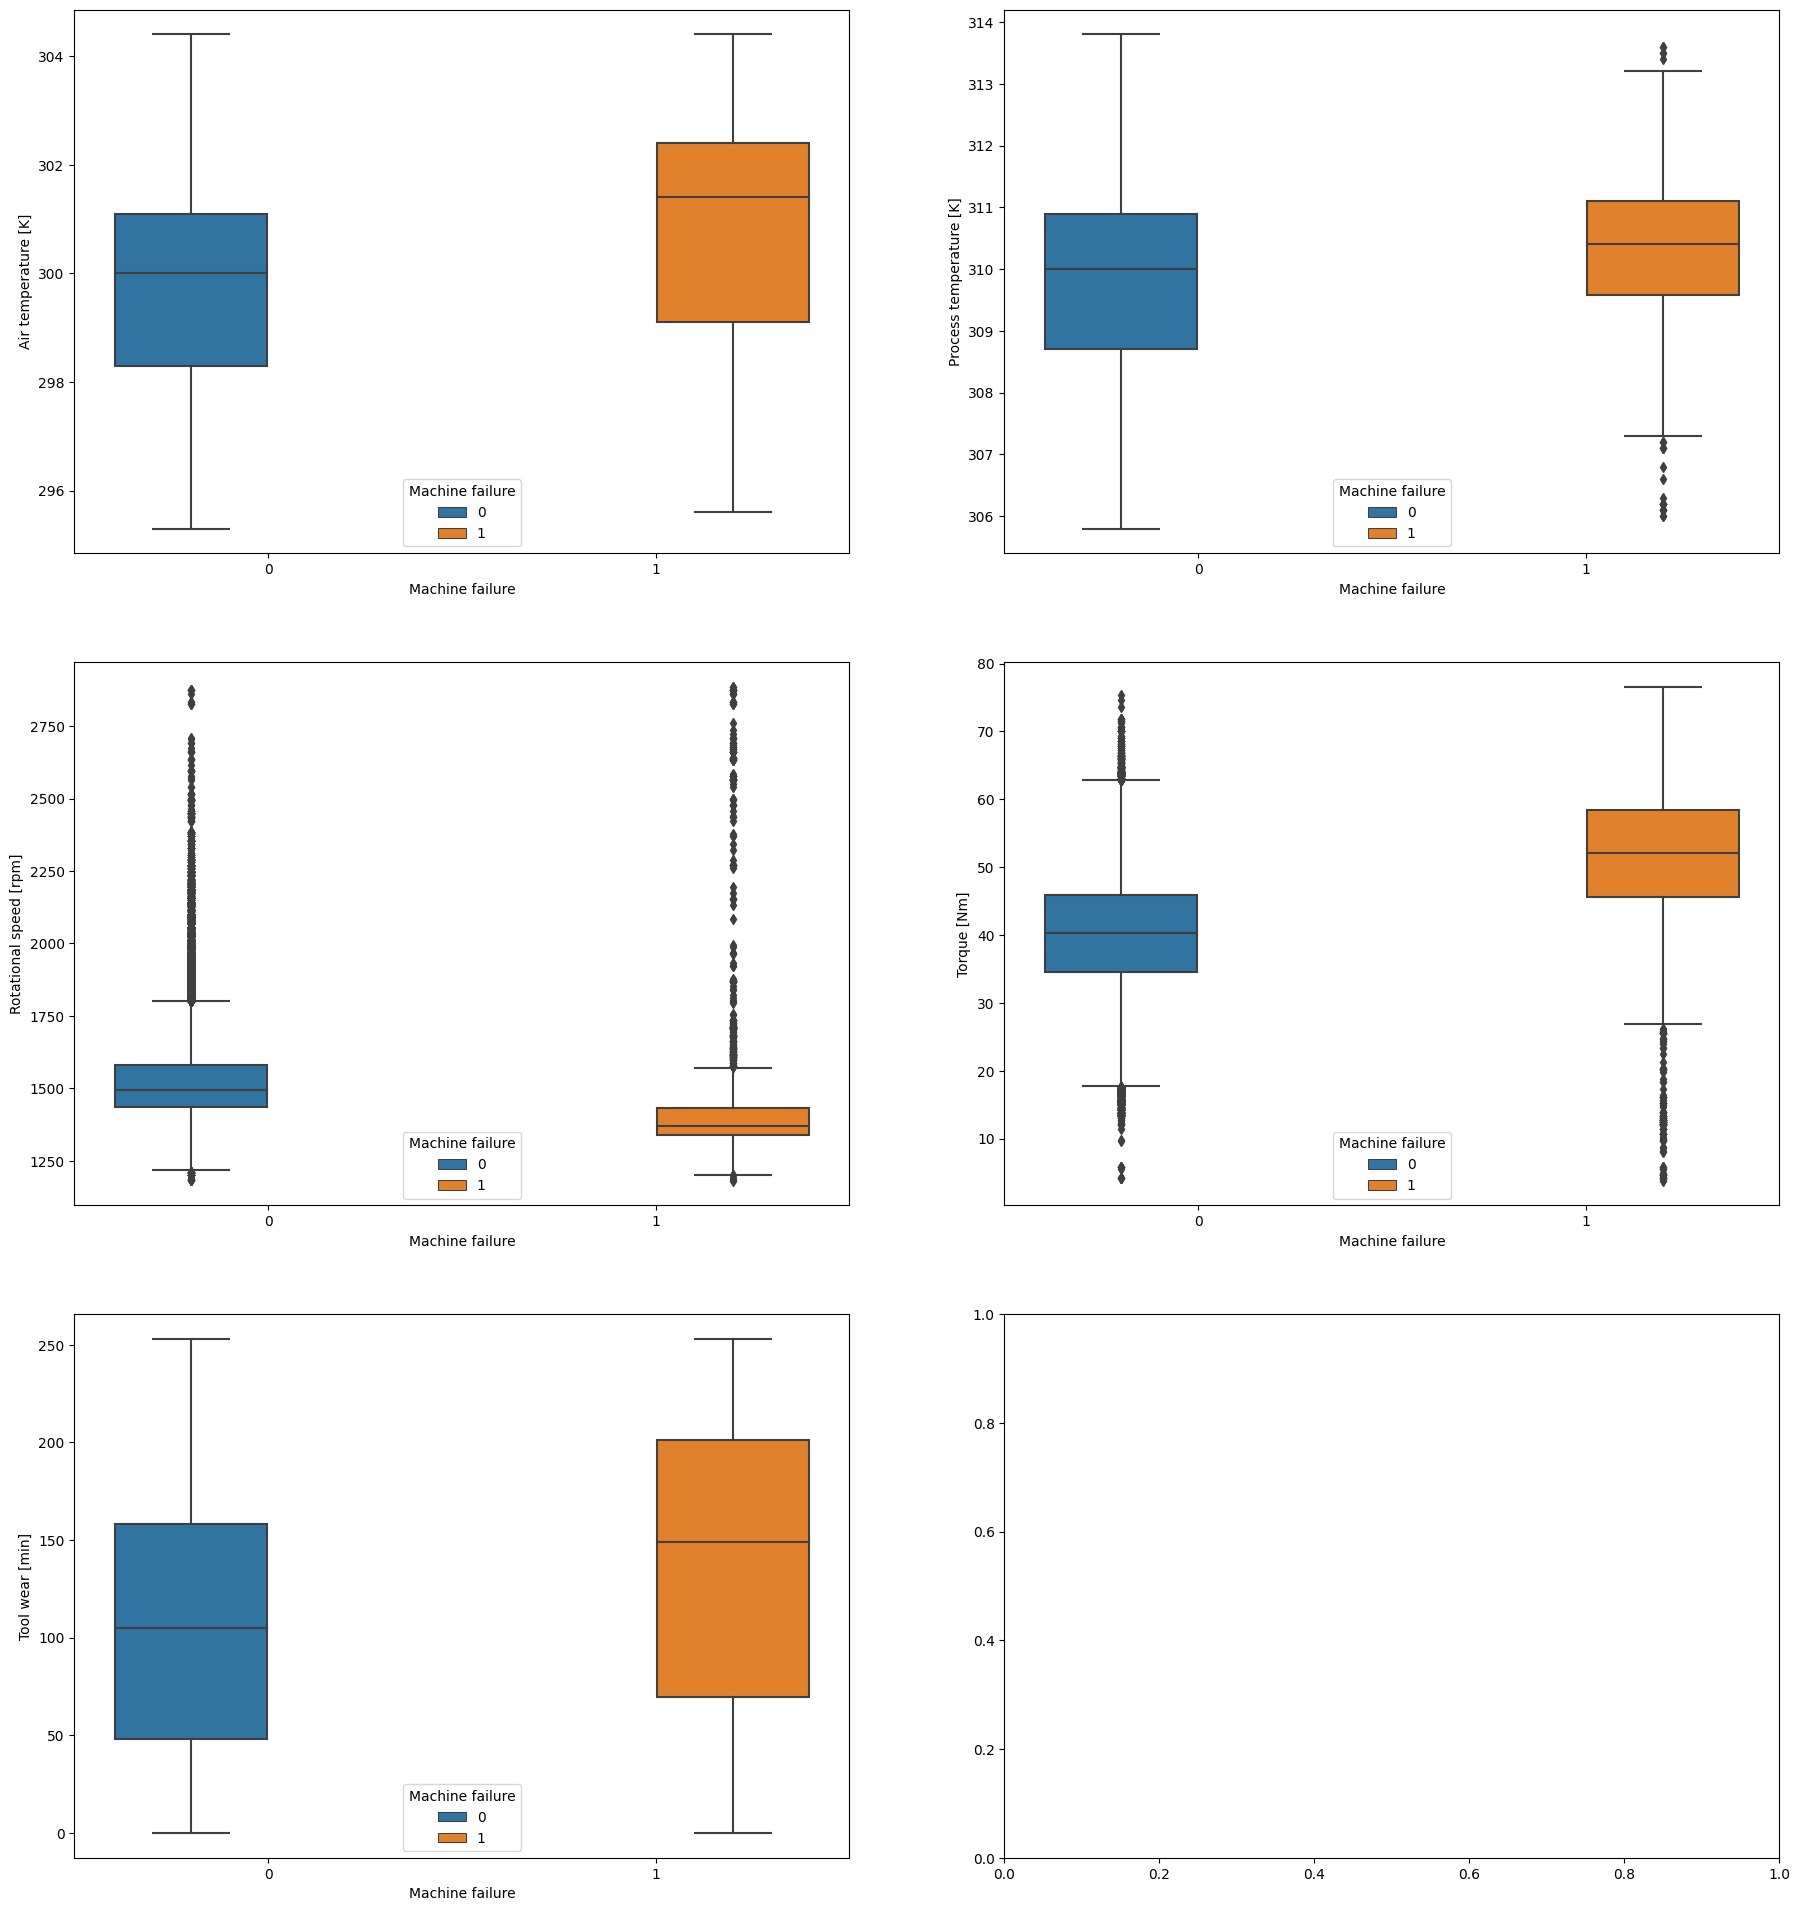

In [17]:
fig, axes = plt.subplots(3, 2, figsize = (22, 24))

sns.boxplot(ax = axes[0, 0], x = 'Machine failure', y = 'Air temperature [K]', hue = 'Machine failure', data = train_df)
sns.boxplot(ax = axes[0, 1], x = 'Machine failure', y = 'Process temperature [K]', hue = 'Machine failure', data = train_df)
sns.boxplot(ax = axes[1, 0], x = 'Machine failure', y = 'Rotational speed [rpm]', hue = 'Machine failure', data = train_df)
sns.boxplot(ax = axes[1, 1], x = 'Machine failure', y = 'Torque [Nm]', hue = 'Machine failure', data = train_df)
sns.boxplot(ax = axes[2, 0], x = 'Machine failure', y = 'Tool wear [min]', hue = 'Machine failure', data = train_df)

From the above boxplots, we see the following:

-The median Air temperature [K] is higher when machine failure is 1.\
-The median of Torque [Nm] is higher when machine failure is 1.\
-The median of Rotational speed [rpm] is higher when machine failure is 0.\
-The median of Tool wear [min] is higher when machine failure is 1.